In [10]:
import numpy as np
import pandas as pd
import random
import os
from PIL import Image 
import matplotlib.pyplot as plt
import torch
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import tensorflow as tf
import copy



#random.seed(0)
#np.random.seed(0)
#torch.manual_seed(0)
#torch.cuda.manual_seed(0)
#torch.backends.cudnn.deterministic = True

In [11]:
def pizza_read(path, x, y):
    names = ['not_pizza', 'pizza']
    for i in range(len(names)):
        for dirname, _, filenames in os.walk(os.path.join(path, names[i])):
            for filename in filenames:
                    img = load_img((os.path.join(dirname, filename)), target_size=(224,224))
                    x.append(img_to_array(img).astype(float))            
                    #x.append(img_to_array(Image.open(os.path.join(dirname, filename)).convert('RGB').resize([224, 224])))
                    y.append(i);
    return x, y

In [12]:
pizza_trainX, pizza_trainY = pizza_read(r'C:\Users\38050\Desktop\programming\python\notebook\kaggle\train', [], [])
pizza_testX, pizza_testY = pizza_read(r'C:\Users\38050\Desktop\programming\python\notebook\kaggle\train', [], [])

pizza_trainX = np.array(pizza_trainX)
pizza_trainY = np.array(pizza_trainY)
pizza_testX = np.array(pizza_trainX)
pizza_testY = np.array(pizza_trainY)
pizza_trainX = torch.from_numpy(pizza_trainX).type(torch.FloatTensor)
pizza_trainY = torch.from_numpy(pizza_trainY).type(torch.LongTensor)
pizza_testX = torch.from_numpy(pizza_testX).type(torch.FloatTensor)
pizza_testY = torch.from_numpy(pizza_testY).type(torch.LongTensor)


In [13]:
class C(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        
        self.fc1   = torch.nn.Linear(IMG_SIZE*IMG_SIZE, 5)
        self.act1  = torch.nn.ReLU()
        
      
        
        self.fc2   = torch.nn.Linear(100, 50)
        self.act2  = torch.nn.ReLU()
        
        self.fc4   = torch.nn.Linear(50, 25)
        self.act4  = torch.nn.ReLU() 
        
        self.fc3   = torch.nn.Linear(25, 2)
    
    def forward(self, x): 
        
        x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
        
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
model = NN() 
best_model = model

In [14]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(16 * 54 * 54, 100)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(100, 50)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(50, 2)
    
    def forward(self, x):
        
        
        x = x.view(x.size(0), x.size(3), x.size(1), x.size(2) )
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        #print(x.shape)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x

    
model = LeNet5() 
best_model = model

In [15]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-2)
best_accuracy = 0

In [16]:
batch_size = 600
print("best accuracy is ", best_accuracy)
test_accuracy_history = []
test_loss_history = []

for epoch in range(100):
    order = np.random.permutation(len(pizza_trainX))
    
    for start_index in range(0, len(pizza_trainX), batch_size):
        optimizer.zero_grad()
        
        batch_indices = order[start_index:start_index+batch_size]
        
        X_batch = pizza_trainX[batch_indices]
        y_batch = pizza_trainY[batch_indices]
        
        
        
        preds = model.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    
    
    test_preds = model.forward(pizza_testX)
    #test_loss_history.append(loss(test_preds, pizza_testY).data)
    
    accuracy = (test_preds.argmax(dim=1) == pizza_testY).float().mean().data
    test_accuracy_history.append(accuracy)
    if (accuracy > best_accuracy):
        best_model = copy.deepcopy(model)
        best_accuracy = accuracy
        print("Saved")
    print(accuracy)
    
    

best accuracy is  0
Saved
tensor(0.4975)
Saved
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0

best accuracy is tensor(0.5000)
tensor(1)
model:  0


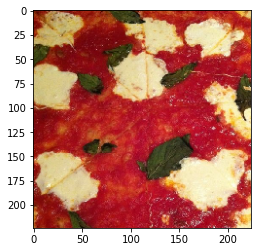

In [17]:
numtest = -46


print("best accuracy is", best_accuracy)
# 45
img = array_to_img(pizza_testX[numtest])
print(pizza_testY[numtest])
print("model: ", torch.max(best_model.forward(pizza_testX[numtest].unsqueeze(0)), dim=1).indices.item())
#print("model: ", torch.max(model.forward(img), dim=1).indices.item())

plt.imshow(img)

In [4]:
print(pizza_trainX)

[[[[  5.   3.   4.]
   [  5.   3.   4.]
   [  5.   3.   4.]
   ...
   [113. 113. 113.]
   [111. 111. 111.]
   [105. 105. 105.]]

  [[  6.   4.   5.]
   [  5.   3.   4.]
   [  6.   4.   5.]
   ...
   [113. 113. 113.]
   [110. 110. 110.]
   [104. 104. 104.]]

  [[  6.   4.   5.]
   [  6.   4.   5.]
   [  6.   4.   5.]
   ...
   [114. 116. 115.]
   [112. 114. 113.]
   [112. 114. 113.]]

  ...

  [[ 50.  44.  46.]
   [ 55.  49.  51.]
   [ 53.  47.  49.]
   ...
   [172. 177. 183.]
   [174. 179. 185.]
   [175. 180. 186.]]

  [[ 46.  40.  42.]
   [ 43.  37.  39.]
   [ 52.  46.  48.]
   ...
   [171. 176. 182.]
   [173. 178. 184.]
   [175. 180. 186.]]

  [[ 47.  41.  43.]
   [ 45.  39.  41.]
   [ 50.  44.  46.]
   ...
   [176. 181. 187.]
   [174. 179. 185.]
   [173. 178. 184.]]]


 [[[ 15.   5.   4.]
   [ 15.   5.   4.]
   [ 15.   5.   4.]
   ...
   [ 10.   4.   4.]
   [  9.   3.   3.]
   [ 10.   4.   4.]]

  [[ 15.   5.   4.]
   [ 15.   5.   4.]
   [ 15.   5.   4.]
   ...
   [  6.   0.   0.]
 

In [16]:
## https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/
class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        
        self.fc1   = torch.nn.Linear(224 * 224 * 3, 224*224*64)
        self.act1  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear( 224*224*64, 112*112*128)
        self.act2  = torch.nn.ReLU()
        
        self.fc4   = torch.nn.Linear(112*112*128, 56*56*256)
        self.act4  = torch.nn.ReLU() 
        
        self.fc5   = torch.nn.Linear(56*56*256, 28*28*512)
        self.act5  = torch.nn.ReLU() 
        
        self.fc6  = torch.nn.Linear(28*28*512, 28*28*512)
        self.act6  = torch.nn.ReLU() 
        
        self.fc7  = torch.nn.Linear(28*28*512, 28*28*512)
        self.act7  = torch.nn.ReLU() 
        
        self.fc8  = torch.nn.Linear(28*28*512, 28*28*512)
        self.act8  = torch.nn.ReLU() 
        
        self.fc9   = torch.nn.Linear(28*28*512, 14*14*512)
        self.act9  = torch.nn.ReLU() 
        
        self.fc10   = torch.nn.Linear(14*14*512, 14*14*512)
        self.act10  = torch.nn.ReLU() 
        
        self.fc11   = torch.nn.Linear(14*14*512, 14*14*512)
        self.act11  = torch.nn.ReLU() 
        
        self.fc12   = torch.nn.Linear(14*14*512, 14*14*512)
        self.act12  = torch.nn.ReLU() 
        
        self.fc13   = torch.nn.Linear(14*14*512, 7*7*512)
        self.act13  = torch.nn.ReLU() 
        
        self.fc14   = torch.nn.Linear( 7*7*512, 1*1*4096)
        self.act14  = torch.nn.ReLU() 
        
        self.fc15   = torch.nn.Linear( 1*1*4096, 1*1*4096)
        self.act15  = torch.nn.ReLU() 
        
        self.fc3   = torch.nn.Linear(1*1*4096, 2)
    
    def forward(self, x): 
        
        x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
        
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        x = self.fc6(x)
        x = self.act6(x)
        x = self.fc7(x)
        x = self.act7(x)
        x = self.fc8(x)
        x = self.act8(x)
        x = self.fc9(x)
        x = self.act9(x)
        x = self.fc10(x)
        x = self.act10(x)
        x = self.fc11(x)
        x = self.act11(x)
        x = self.fc12(x)
        x = self.act12(x)
        x = self.fc13(x)
        x = self.act13(x)
        x = self.fc14(x)
        x = self.act14(x)
        x = self.fc15(x)
        x = self.act15(x)
        
        x = self.fc3(x)
        
        return x
    
model = NN() 

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1933540589568 bytes.